     centro  anyy  mes  dia  id_cliente  tipo c_postal  base_fra  pIva  \
0       BCN  2021    2   14        2412     7  '08002'      1499    21   
1       BCN  2020    3   21        1081     8  '08050'      1304    21   
2       BCN  2020   12   16         582     6  '08003'      2254    21   
3       BCN  2020    2   28        1264     1  '08050'      1271    21   
4       BCN  2020    7    6        1320     4  '08001'      1363    21   
...     ...   ...  ...  ...         ...   ...      ...       ...   ...   
4994    BCN  2021   10    9         522     5  '08050'      1778    21   
4995    BCN  2020    4   25        1369     8  '08050'       751    21   
4996    BCN  2021    6   23        2282     8  '08050'      1236    21   
4997    BCN  2021    3   18        2218     3  '08003'      1521    21   
4998    BCN  2020   10   28        1174     1  '08002'      2318    21   

      total_fra  portes  
0       1813.79      43  
1       1577.84      92  
2       2727.34       5  
3      

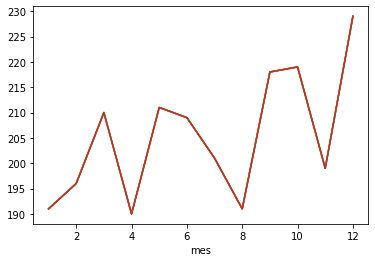

In [3]:
import tkinter as ttk
from tkinter import *
import pandas as pd
from tkinter import filedialog


def navegar():
    
    global df
    
    filename = filedialog.askopenfilename(parent=window, 
                                      title = "Selecciona ",
                                      initialdir = "./dat/", 
                                      filetypes = (("csv","*.csv"),
                                                 ("all files","*.*")))

    df = pd.read_csv(filename, sep=";")
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.width', 1000) 

def agrupar():
    if value == 1:
        
        

def selec():
    pass

def calcular():
    df = pd.read_csv("./dat/datos_fras.csv", sep=";", index_col=False)
    print (df)
    if agrupar.get() == 6 :
        columnas.insert(0,'tipo')
    elif agrupar.get() == 7 :
        columnas.insert(0,'c_postal')
        
    dfNov = df[(df['anyy'] == 2021 )]
    dfgraf = dfNov.groupby('mes')['total_fra'].count()
    print(dfgraf)
    dfgraf.plot()
    
    resultado.delete(1.0, 'end')
    resultado.insert('insert', dfgraf)
    

        
root = Tk()
root.config(bd=15)
root.title("prj_texto.py")
root.geometry('800x800')

# ------------------------------


agrupar = IntVar() ;  # 0=Centro, 1=TipoCliente , 2 = Distrito
desglose = IntVar() ; # 0 = total anual ; 1 = por meses
factura = IntVar()  ;  # 0 = no contar facturas , 1 = contar facturas 
totales = IntVar()  ;  # 0 = no contar totales , 1 = contar totales

resultado = Text(root);

columnas = ['anyy']
operaciones = []


df = pd.read_csv("./dat/datos_fras.csv", sep=";", index_col=False)
print (df)

dfNov = df[(df['anyy'] == 2021 )]
dfgraf = dfNov.groupby('mes')['total_fra'].count()
print(dfgraf)
dfgraf.plot()

Label(root, text ="Como quiere agrupar, ¿Por centro, tipo de cliente o distrito?").pack()
Radiobutton(root, text="Centro", variable=agrupar, value=5, command=agrupar).pack()
Radiobutton(root, text="TipoCliente", variable=agrupar, value=6, command=agrupar).pack()
Radiobutton(root, text="Distrito", variable=agrupar, value=7, command=agrupar).pack()



Label(root, text ="Como quiere desglosar, ¿Por año o mes?").pack()
Radiobutton(root, text="Anual", variable=desglose, value=1, command=selec).pack()
Radiobutton(root, text="Mes", variable=desglose, value=0, command=selec).pack()

Label(root, text="Seleccione entre Nº total de ventas o el Nº de Factura:").pack()
Checkbutton(root, text="Nº total ventas", variable=factura, 
            onvalue=1, offvalue=0).pack()
Checkbutton(root, text="Nº de factura", variable=factura, 
            onvalue=0, offvalue=1).pack()


Button(root, text="Calcular", command=calcular).pack()


label = Label(root,justify="center", text="Resultado").pack()

resultado = Text(root, width = 80, height=10)
resultado.pack()
Entry(root, justify=CENTER, state=DISABLED).pack()
# ------------------------------

root.mainloop()
